In [2]:
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt

The sinogram can be created based on two ways: using most likely paths (see `System generation.ipynb`) and using the skimage radon transoform method (this script). The later is faster as we do not need to create the paths in order to create the WEPLs. Remember, we are dealing with the following equation:
\begin{align*}
    b &= \mathbf{A} x,
\end{align*}
while $y$ is the total energy loss, the matrix $\mathbf{A}$ contains the estimated paths and the vector $x$ represents the relative stopping power (RSP).

In [15]:
rsp = np.load('../../Data/simple_pCT/Phantoms/Head/RSP.npy')
print(rsp.shape)

(130, 1026, 1026)


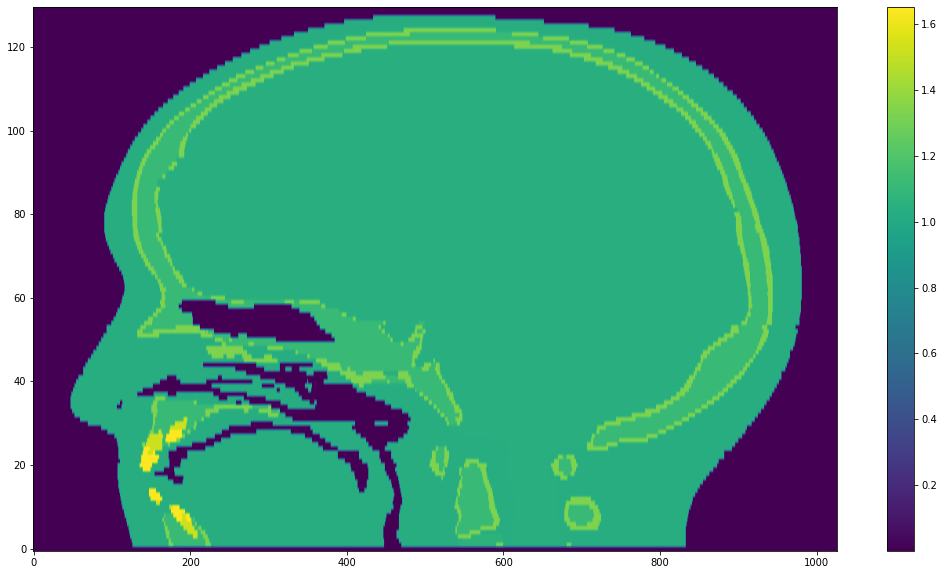

In [18]:
plt.figure(figsize=(18,10))
plt.imshow(rsp[:,:,rsp.shape[2]//2], origin='lower', aspect='auto')
plt.colorbar()
plt.show()

/home/vik/Programme/anaconda3/envs/pct/lib/python3.10/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


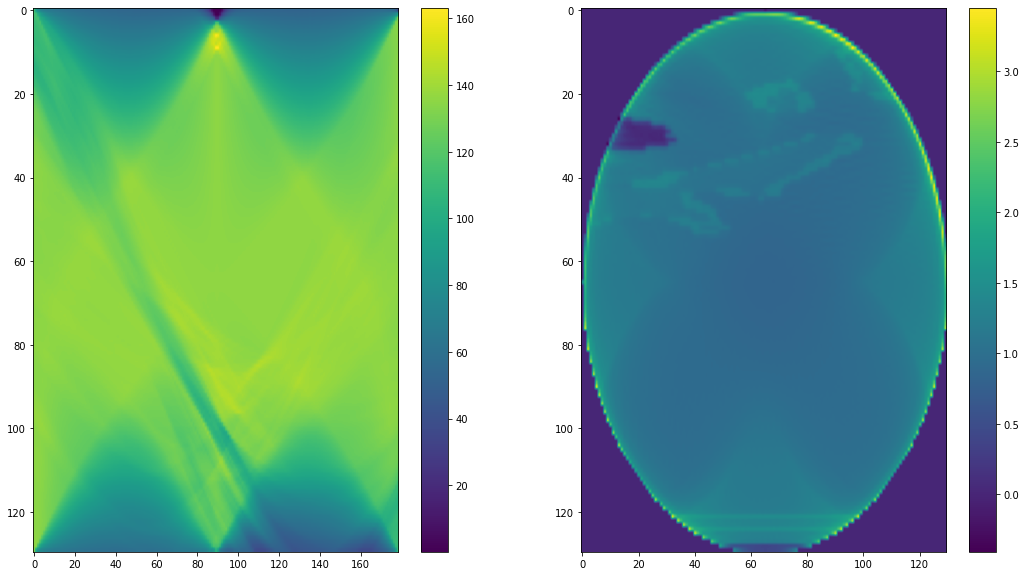

In [27]:
num_angle = 179
num_spotx = 125

theta = np.linspace(0., 180., num_angle, endpoint=False)

wepl = transform.radon(rsp[:,:,rsp.shape[2]//2], theta, True)
reconstructed = transform.iradon(wepl, theta)

plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.imshow(wepl, aspect='auto')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(reconstructed, aspect='auto')
plt.colorbar()
plt.show()